In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [44]:
tf.__version__

'2.7.0'

In [10]:
mnist = tf.keras.datasets.mnist # 28x28 images of handwritten digits 0-9

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

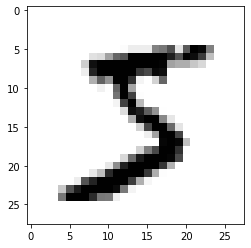

In [13]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [15]:
#Since the pixel data is between 0-255, 
#we normalize it to be between 0-1 for network to understand easily
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

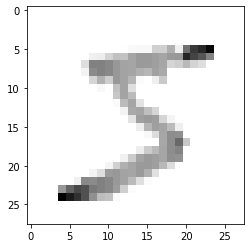

In [16]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [17]:
#sequential is the basic model
model = tf.keras.models.Sequential()

# we add hidden layers into our network. 128 is the number of neurons that we use
# relu is a basic activation sigmoid function
# softmax is used for probability distribution (used in final/output layer with 10 neurons)
# we reduce 28x28 array to a flatten layer as it is multidimensional and hard to compute
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

#parameters for training for the model

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2635 - accuracy: 0.9223
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1079 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0745 - accuracy: 0.9771


In [21]:
# calculate the validation loss

val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(val_loss, val_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0951 - accuracy: 0.9713
0.09510048478841782 0.9713000059127808


In [22]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [23]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [38]:
predictions = new_model.predict([x_test])

In [39]:
print(predictions[10])

[9.9993408e-01 1.5764660e-06 2.7362234e-05 2.3834555e-07 3.0507776e-09
 2.3304633e-06 4.7128583e-06 3.6641488e-06 1.6674793e-08 2.5917905e-05]


In [40]:
import numpy as np
print(np.argmax(predictions[10]))

0


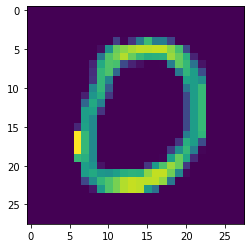

In [42]:
plt.imshow(x_test[10])
plt.show()

In [43]:
import pandas as pd 
pd.DataFrame(x_test[0]).to_csv("x_test.csv")
pd.DataFrame(predictions[0]).to_csv("predictions.csv")